### Directed Louvain

**Layout 1: network based on edge impedances**

**Layout 2: network based on flows**
Two panel: Geospatial (L) and force-directed (R)

In [1]:
import os, pickle, sys
import json
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from shapely import geometry

import geopandas as gpd

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import pandas as pd
import numpy as np
import networkx as nx

In [3]:
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [4]:
sys.path.append(root)

In [5]:
from ffsc.flow import *

In [6]:
# dictionary assigning colors to different features of the network
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [7]:
# dictionary assigning paths to .csv files
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe_alt.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

In [8]:
gen = make_nx('coal')

carrier: coal
recipes used: coal


In [9]:
gen.all_data_dirs = all_data_dirs

In [10]:
gen._load_dfs()

In [11]:
gen._fill_graph()

INFO:ffsc.flow.network_flow:doing step add coalmines -> railways...
INFO:ffsc.flow.network_flow:doing step add railways -> railways...
INFO:ffsc.flow.network_flow:doing step add railways <- railways...
INFO:ffsc.flow.network_flow:doing step add railways -> ports...
INFO:ffsc.flow.network_flow:ports-railways missing distance
INFO:ffsc.flow.network_flow:['Unnamed: 0', 'Unnamed: 0.1', 'PortNode:START_ID(PortNode)', 'RailwayNodeID:END_ID(PipelineNode)', ':TYPE']
INFO:ffsc.flow.network_flow:doing step add railways <- ports...
INFO:ffsc.flow.network_flow:doing step add ports -> shipping_lanes...
INFO:ffsc.flow.network_flow:ports-shipping missing distance
INFO:ffsc.flow.network_flow:['PortNode:START_ID(PortNode)', 'ShipNode:END_ID(ShippingNode)', ':TYPE', 'impedance']
INFO:ffsc.flow.network_flow:doing step add ports <- shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes -> shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes <- shipping_lanes...


In [12]:
gen._prep_flow()

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
scope power stations) 17876 28664
INFO:ffsc.flow.network_flow:checking powerstation paths...
INFO:ffsc.flow.network_flow:ii_p 0, p_count 0
INFO:ffsc.flow.network_flow:ii_p 1000, p_count 304
INFO:ffsc.flow.network_flow:ii_p 2000, p_count 567
INFO:ffsc.flow.network_flow:ii_p 3000, p_count 582
INFO:ffsc.flow.network_flow:ii_p 4000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 5000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 6000, p_count 608
INFO:ffsc.flow.network_flow:ii_p 7000, p_count 652
INFO:ffsc.flow.network_flow:ii_p 8000, p_count 705
INFO:ffsc.flow.network_flow:ii_p 9000, p_count 751
INFO:ffsc.flow.network_flow:ii_p 10000, p_count 757
INFO:ffsc.flow.network_flow:ii_p 11000, p_count 759
INFO:ffsc.flow.network_flow:ii_p 12000, p_count 780
INFO:ffsc.flow.network_flow:ii_p 13000, p_count 796
INFO:ffsc.flow.network_flo

**approach:**
- get all the data into nice geopandas dfs
- filter the gdfs on the network edges
- plot the gdfs

In [13]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [14]:
all_data = {}
for kk,vv in all_data_dirs.items():
    all_data[kk]= pd.read_csv(vv)

In [15]:
#pickle.load(open(os.path.join('.','..','results_backup','primary','prm_shipping_routes_data.pkl'),'rb'))

In [16]:
# join geometris back to shipping nodes
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['StartNodeId:START_ID(ShippingNode)','starting_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='StartNodeId:START_ID(ShippingNode)')
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['EndNodeId:END_ID(ShippingNode)','end_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='EndNodeId:END_ID(ShippingNode)')
all_data['shipping-N']['coordinates']=all_data['shipping-N']['starting_point']
all_data['shipping-N']['coordinates'] = all_data['shipping-N']['coordinates'].fillna(all_data['shipping-N']['end_point'])

In [17]:
# replace parentheses with sq brackets
all_data['pipelines-N']['coordinates'] = all_data['pipelines-N']['coordinates'].str.replace('(','[').str.replace(')',']')
all_data['railways-N']['coordinates'] = all_data['railways-N']['coordinates'].str.replace('(','[').str.replace(')',']')

In [18]:
all_nodes = pd.DataFrame({'node_ID':[],'coordinates':[]})

In [19]:
for kk, vv in all_data.items():
    if kk.split('-')[-1]=='N':
        print (kk)
        id_col = [cc for cc in vv.columns if 'ID' in cc][0]
        tmp = vv[[id_col, 'coordinates']]
        tmp = tmp.rename(columns={id_col:'node_ID'})
        # print (tmp.head(5))
        all_nodes = all_nodes.append(tmp)

cities-N
coalmines-N
lng-N
oilfields-N
pipelines-N
ports-N
powerstn-N
procplant-N
railways-N
refineries-N
shipping-N
wellpads-N


**do edges_df**

In [20]:
edge_df = pd.DataFrame.from_records([{'start':e[0],'end':e[1],'z':e[2]['z']} for e in gen.G.edges(data=True)])

In [21]:
edge_df = edge_df[edge_df.start!='supersource']

In [22]:
edge_df['start_type'] = edge_df.start.str.split('_').str[0]
edge_df['end_type'] = edge_df.end.str.split('_').str[0]

In [23]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='start', right_on='node_ID').rename(columns={'node_ID':'snode_ID', 'coordinate':'start_coordinates'})

In [24]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='end', right_on='node_ID').rename(columns={'node_ID':'enode_ID', 'coordinate':'end_coordinates'})

In [25]:
edge_df = edge_df.drop(columns=['snode_ID','enode_ID'])

In [26]:
edge_df.rename(columns={'coordinates_x':'start_coordinates', 'coordinates_y':'end_coordinates'}, inplace=True)

In [27]:
edge_df['start_coordinates'] = edge_df['start_coordinates'].apply(json.loads)
edge_df['end_coordinates'] = edge_df['end_coordinates'].apply(json.loads)

In [28]:
edge_df['geometry'] = edge_df.apply(lambda row: geometry.LineString([row['start_coordinates'], row['end_coordinates']]), axis=1)

In [29]:
edge_gdf = gpd.GeoDataFrame(edge_df, geometry=edge_df['geometry'], crs={'init':'epsg:4326'})

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [30]:
# #def vis_connected_network(G):
# fig, ax = plt.subplots(1,1,figsize=(40,20))
# ne.plot(ax=ax, color='#e3e3e3')

# # plot edges
# edge_gdf[(edge_gdf['start_type']=='railway') & (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf[(edge_gdf['start_type']=='shipping') & (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


# ax.set_xlim([-180,180])
# ax.set_ylim([-62,90])
# ax.axis('off')
# #fig.savefig('coal_supplynetwork.png')

# plt.show()

> A Graph showing all the Edges that are Solely Railway or Shipping Routes
 - shipping routes (#7f5636 -> brown)
 - railways (#646464 -> grey)

In [31]:
edge_df

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry
0,coal_mine_1920,railway_node_25.9047571-24.6667781,0,coal,railway,"[25.917000000186725, -24.666999999954218]","[25.9047571, -24.6667781]","LINESTRING (25.91700 -24.66700, 25.90476 -24.6..."
1,railway_node_25.9047571-24.6667781,railway_node_25.9047571-24.6664075,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047571, -24.6664075]","LINESTRING (25.90476 -24.66678, 25.90476 -24.6..."
2,railway_node_25.9047571-24.6667781,railway_node_25.9047254-24.6670633,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047254, -24.6670633]","LINESTRING (25.90476 -24.66678, 25.90473 -24.6..."
3,coal_mine_1922,railway_node_53.3958054211536635.55213928019969,0,coal,railway,"[53.394000000101364, 35.57499999971285]","[53.39580542115366, 35.55213928019969]","LINESTRING (53.39400 35.57500, 53.39581 35.55214)"
4,railway_node_53.3958054211536635.55213928019969,railway_node_53.38116831558798535.542777921444795,0,railway,railway,"[53.39580542115366, 35.55213928019969]","[53.381168315587985, 35.542777921444795]","LINESTRING (53.39581 35.55214, 53.38117 35.54278)"
...,...,...,...,...,...,...,...,...
2258601,shipping_node_34564,shipping_node_34768,1212,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1..."
2258602,shipping_node_34564,shipping_node_33992,508,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1..."
2258603,shipping_node_33992,shipping_node_34564,508,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1..."
2258604,shipping_node_33992,shipping_node_34768,49,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1..."


**do nodes df**

In [32]:
node_df = pd.DataFrame.from_records([{'node':n[0],'D':n[1]['D']} for n in gen.G.nodes(data=True)])

In [33]:
node_df = node_df.merge(all_nodes, how='left',left_on='node',right_on='node_ID')

In [34]:
node_df = node_df[node_df.node!='supersource']

In [35]:
node_df['geometry'] = node_df['coordinates'].apply(json.loads).apply(geometry.Point)

In [36]:
node_gdf = gpd.GeoDataFrame(node_df, geometry=node_df['geometry'], crs = {'init':'epsg:4326'})

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [37]:
node_gdf['type']=node_gdf['node'].str.split('_').str[0]

In [38]:
node_gdf

,node,D,node_ID,coordinates,geometry,type
0,coal_mine_1920,0,coal_mine_1920,"[25.917000000186725, -24.666999999954218]",POINT (25.91700 -24.66700),coal
1,railway_node_25.9047571-24.6667781,0,railway_node_25.9047571-24.6667781,"[25.9047571, -24.6667781]",POINT (25.90476 -24.66678),railway
2,coal_mine_1922,0,coal_mine_1922,"[53.394000000101364, 35.57499999971285]",POINT (53.39400 35.57500),coal
3,railway_node_53.3958054211536635.55213928019969,0,railway_node_53.3958054211536635.55213928019969,"[53.39580542115366, 35.55213928019969]",POINT (53.39581 35.55214),railway
4,coal_mine_1923,0,coal_mine_1923,"[52.98099999974161, 36.17099999993142]",POINT (52.98100 36.17100),coal
...,...,...,...,...,...,...
1057524,city_node_9970,9,city_node_9970,"[9.140014958055534, 12.218561270578235]",POINT (9.14001 12.21856),city
1057525,city_node_9981,6,city_node_9981,"[6.893405117769672, 11.846367254346195]",POINT (6.89341 11.84637),city
1057526,city_node_9989,16,city_node_9989,"[13.147584159650059, 11.766774687687745]",POINT (13.14758 11.76677),city
1057527,city_node_9990,75,city_node_9990,"[8.593431162223446, 12.00241287418524]",POINT (8.59343 12.00241),city


In [39]:
node_gdf['type'].unique()

array(['coal', 'railway', 'port', 'shipping', 'power', 'city'],
      dtype=object)

In [40]:
# #def vis_connected_network(G):
# fig, ax = plt.subplots(1,1,figsize=(40,20))
# ne.plot(ax=ax, color='#e3e3e3')
# # plot coal mines, ports, cities, power stations

# node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

# node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
# node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# # plot edges
# edge_gdf[(edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf[(edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


# ax.set_xlim([-180,180])
# ax.set_ylim([-62,90])
# ax.axis('off')
# fig.savefig('coal_supplynetwork.png')

# plt.show()

### Force-Directed Layout

Out of memory error... loolll
... try again once having run community detection

In [71]:
edge_df['z_inv'] = 1/(edge_df['z']+1)

In [72]:
len(node_df.node.unique())

1031170

In [73]:
# get pos as dict
pos = node_df.drop_duplicates(subset='node')[['node','coordinates']].set_index('node').to_dict('index')

In [74]:
pos = {kk:json.loads(vv['coordinates']) for kk, vv in pos.items()}

In [75]:
z_inv_attr = edge_df[['start','end','z_inv']].set_index(['start','end']).to_dict(orient='index')

In [76]:
nx.set_edge_attributes(gen.G, z_inv_attr)

In [77]:
# pos = nx.spring_layout(gen.G, pos, iterations=1, weight='z_inv')
# big ole 'out of memory' error

### load flows and visualise them

In [78]:
flow_dict = pickle.load(open('./../coal_flow_dict.pkl','rb'))

In [79]:
len(flow_dict.keys())

1031171

In [80]:
flow_dict_reshape = {(i,j): flow_dict[i][j] 
                           for i in flow_dict.keys() 
                           for j in flow_dict[i].keys()}

In [81]:
flow_dict_reshape

{('coal_mine_1920', 'railway_node_25.9047571-24.6667781'): 14684,
 ('railway_node_25.9047571-24.6667781',
  'railway_node_25.9047571-24.6664075'): 14684,
 ('railway_node_25.9047571-24.6667781',
  'railway_node_25.9047254-24.6670633'): 0,
 ('coal_mine_1922', 'railway_node_53.3958054211536635.55213928019969'): 4677,
 ('railway_node_53.3958054211536635.55213928019969',
  'railway_node_53.38116831558798535.542777921444795'): 4570,
 ('railway_node_53.3958054211536635.55213928019969',
  'railway_node_53.4143905469255735.55813984128466'): 107,
 ('coal_mine_1923', 'railway_node_52.97519310345878636.17194361255421'): 301,
 ('railway_node_52.97519310345878636.17194361255421',
  'railway_node_52.9916115331686136.16469565131024'): 0,
 ('railway_node_52.97519310345878636.17194361255421',
  'railway_node_52.9547501069948936.182582800548694'): 301,
 ('coal_mine_1926', 'railway_node_-2.18300434.3093436'): 100505,
 ('railway_node_-2.18300434.3093436',
  'railway_node_-2.186293834.3087238'): 100505,
 ('

In [82]:
flow_df = pd.DataFrame.from_dict(flow_dict_reshape, orient='index')

In [83]:
flow_df['source']=flow_df.index.str[0]

In [84]:
flow_df = flow_df[~(flow_df.source=='supersource')]

In [85]:
flow_df = flow_df.rename(columns={0:'flow'})

In [86]:
flow_df

,flow,source
"(coal_mine_1920, railway_node_25.9047571-24.6667781)",14684,coal_mine_1920
"(railway_node_25.9047571-24.6667781, railway_node_25.9047571-24.6664075)",14684,railway_node_25.9047571-24.6667781
"(railway_node_25.9047571-24.6667781, railway_node_25.9047254-24.6670633)",0,railway_node_25.9047571-24.6667781
"(coal_mine_1922, railway_node_53.3958054211536635.55213928019969)",4677,coal_mine_1922
"(railway_node_53.3958054211536635.55213928019969, railway_node_53.38116831558798535.542777921444795)",4570,railway_node_53.3958054211536635.55213928019969
...,...,...
"(shipping_node_34564, shipping_node_34768)",0,shipping_node_34564
"(shipping_node_34564, shipping_node_33992)",0,shipping_node_34564
"(shipping_node_33992, shipping_node_34564)",0,shipping_node_33992
"(shipping_node_33992, shipping_node_34768)",0,shipping_node_33992


In [87]:
edge_df = edge_df.set_index(['start','end'])

In [88]:
edge_df['flow']=0

In [89]:
edge_df

z  \
start                                           end                                                       
coal_mine_1920                                  railway_node_25.9047571-24.6667781                    0   
railway_node_25.9047571-24.6667781              railway_node_25.9047571-24.6664075                    0   
                                                railway_node_25.9047254-24.6670633                    0   
coal_mine_1922                                  railway_node_53.3958054211536635.55213928019969       0   
railway_node_53.3958054211536635.55213928019969 railway_node_53.38116831558798535.542777921444795     0   
...                                                                                                 ...   
shipping_node_34564                             shipping_node_34768                                1212   
                                                shipping_node_33992                                 508   
shipping_node_33992                             shipping_node_34564                                 508   
                                                shipping_node_34768                                  49   
shipping_node_125192                            shipping_node_125717                                712   

                                                                                                  start_type  \
start                                           end                                                            
coal_mine_1920                                  railway_node_25.9047571-24.6667781                      coal   
railway_node_25.9047571-24.6667781              railway_node_25.9047571-24.6664075                   railway   
                                                railway_node_25.9047254-24.6670633                   railway   
coal_mine_1922                                  railway_node_53.3958054211536635.55213928019969         coal   
railway_node_53.3958054211536635.55213928019969 railway_node_53.38116831558798535.542777921444795    railway   
...                                                                                                      ...   
shipping_node_34564                             shipping_node_34768                                 shipping   
                                                shipping_node_33992                                 shipping   
shipping_node_33992                             shipping_node_34564                                 shipping   
                                                shipping_node_34768                                 shipping   
shipping_node_125192                            shipping_node_125717                                shipping   

                                                                                                   end_type  \
start                                           end                                                           
coal_mine_1920                                  railway_node_25.9047571-24.6667781                  railway   
railway_node_25.9047571-24.6667781              railway_node_25.9047571-24.6664075                  railway   
                                                railway_node_25.9047254-24.6670633                  railway   
coal_mine_1922                                  railway_node_53.3958054211536635.55213928019969     railway   
railway_node_53.3958054211536635.55213928019969 railway_node_53.38116831558798535.542777921444795   railway   
...                                                                                                     ...   
shipping_node_34564                             shipping_node_34768                                shipping   
                                                shipping_node_33992                                shipping   
shipping_node_33992                             shipping_node_34564                                shipping   
                                

In [90]:
edge_df.loc[flow_df.index, 'flow'] = flow_df['flow']

In [91]:
edge_df.flow.sum()

14771218517

In [92]:
edge_df = edge_df.reset_index()

In [93]:
edge_df = edge_df[edge_df['start']!='supersource']

In [94]:
edge_df

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry,z_inv,flow
0,coal_mine_1920,railway_node_25.9047571-24.6667781,0,coal,railway,"[25.917000000186725, -24.666999999954218]","[25.9047571, -24.6667781]","LINESTRING (25.91700 -24.66700, 25.90476 -24.6...",1.000000,14684
1,railway_node_25.9047571-24.6667781,railway_node_25.9047571-24.6664075,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047571, -24.6664075]","LINESTRING (25.90476 -24.66678, 25.90476 -24.6...",1.000000,14684
2,railway_node_25.9047571-24.6667781,railway_node_25.9047254-24.6670633,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047254, -24.6670633]","LINESTRING (25.90476 -24.66678, 25.90473 -24.6...",1.000000,0
3,coal_mine_1922,railway_node_53.3958054211536635.55213928019969,0,coal,railway,"[53.394000000101364, 35.57499999971285]","[53.39580542115366, 35.55213928019969]","LINESTRING (53.39400 35.57500, 53.39581 35.55214)",1.000000,4677
4,railway_node_53.3958054211536635.55213928019969,railway_node_53.38116831558798535.542777921444795,0,railway,railway,"[53.39580542115366, 35.55213928019969]","[53.381168315587985, 35.542777921444795]","LINESTRING (53.39581 35.55214, 53.38117 35.54278)",1.000000,4570
...,...,...,...,...,...,...,...,...,...,...
2258601,shipping_node_34564,shipping_node_34768,1212,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1...",0.000824,0
2258602,shipping_node_34564,shipping_node_33992,508,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1...",0.001965,0
2258603,shipping_node_33992,shipping_node_34564,508,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1...",0.001965,0
2258604,shipping_node_33992,shipping_node_34768,49,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1...",0.020000,0


> A Graph showing all the Edges that are Solely Railway or Shipping Routes, all the Nodes of Ports and Coal Mines and Nodes of Cities and Power Stations where D > 0
 - shipping routes (#7f5636 -> brown)
 - railways (#646464 -> grey)
 - ports (#7f5636 -> brown)
 - coal mines (#89163e -> burgundy)
 - cities (#96C3E4 -> sky blue)
 - power_stations (#8ac27e -> lime green)

## Directed Louvain Community Detection

### Load Nodes to Communities from Directed Louvain

In [41]:
#### choose which file to load here!!


with open(os.path.join(root,'DirectedLouvain','output','graph_coal_flow_node2comm_level0')) as inp:
    rows = (line.split(' ') for line in inp)
    node2comm_coal = {int(row[0]):int(row[1]) for row in rows}

In [42]:
node2comm_coal

{0: 14988,
 1: 14988,
 2: 420342,
 3: 420342,
 4: 930520,
 5: 930520,
 6: 24907,
 7: 24907,
 8: 22169,
 9: 22169,
 10: 15543,
 11: 15543,
 12: 0,
 13: 1,
 14: 2,
 15: 3,
 16: 25606,
 17: 25606,
 18: 4,
 19: 5,
 20: 6,
 21: 6,
 22: 7,
 23: 8,
 24: 50544,
 25: 50544,
 26: 917925,
 27: 917925,
 28: 39517,
 29: 39517,
 30: 9,
 31: 10,
 32: 50813,
 33: 50813,
 34: 11,
 35: 12,
 36: 93654,
 37: 93654,
 38: 87542,
 39: 87542,
 40: 927245,
 41: 927245,
 42: 13,
 43: 14,
 44: 842137,
 45: 842137,
 46: 790731,
 47: 790731,
 48: 15,
 49: 16,
 50: 17,
 51: 18,
 52: 789559,
 53: 789559,
 54: 19,
 55: 20,
 56: 21,
 57: 22,
 58: 23,
 59: 24,
 60: 25,
 61: 26,
 62: 27,
 63: 28,
 64: 304367,
 65: 304367,
 66: 29,
 67: 30,
 68: 31,
 69: 32,
 70: 33,
 71: 34,
 72: 35,
 73: 36,
 74: 37,
 75: 38,
 76: 306655,
 77: 306655,
 78: 39,
 79: 40,
 80: 41,
 81: 42,
 82: 43,
 83: 44,
 84: 45,
 85: 46,
 86: 811933,
 87: 811933,
 88: 47,
 89: 48,
 90: 49,
 91: 50,
 92: 51,
 93: 790731,
 94: 52,
 95: 53,
 96: 54,
 97:

In [43]:
node_df['coordinates'][0]

'[25.917000000186725, -24.666999999954218]'

### Create dictionary of communities (keys) to nodes in community (values)

In [44]:
comm2nodes_coal = {}
for k, v in node2comm_coal.items():
    comm2nodes_coal.setdefault(v, []).append(k)

In [45]:
# comm2nodes_coal

### Switch number of nodes in this dictionary to their coordinates

In [46]:
import copy

In [47]:
comm2coord_coal = copy.deepcopy(comm2nodes_coal)

for i in range(len(comm2coord_coal)):
    for j in range (len(comm2coord_coal[i])):
        comm2coord_coal[i][j] = node_df['coordinates'][comm2coord_coal[i][j]]

In [48]:
# comm2coord_coal

## General information about the Graph

In [49]:
node_df

,node,D,node_ID,coordinates,geometry,type
0,coal_mine_1920,0,coal_mine_1920,"[25.917000000186725, -24.666999999954218]",POINT (25.91700 -24.66700),coal
1,railway_node_25.9047571-24.6667781,0,railway_node_25.9047571-24.6667781,"[25.9047571, -24.6667781]",POINT (25.90476 -24.66678),railway
2,coal_mine_1922,0,coal_mine_1922,"[53.394000000101364, 35.57499999971285]",POINT (53.39400 35.57500),coal
3,railway_node_53.3958054211536635.55213928019969,0,railway_node_53.3958054211536635.55213928019969,"[53.39580542115366, 35.55213928019969]",POINT (53.39581 35.55214),railway
4,coal_mine_1923,0,coal_mine_1923,"[52.98099999974161, 36.17099999993142]",POINT (52.98100 36.17100),coal
...,...,...,...,...,...,...
1057524,city_node_9970,9,city_node_9970,"[9.140014958055534, 12.218561270578235]",POINT (9.14001 12.21856),city
1057525,city_node_9981,6,city_node_9981,"[6.893405117769672, 11.846367254346195]",POINT (6.89341 11.84637),city
1057526,city_node_9989,16,city_node_9989,"[13.147584159650059, 11.766774687687745]",POINT (13.14758 11.76677),city
1057527,city_node_9990,75,city_node_9990,"[8.593431162223446, 12.00241287418524]",POINT (8.59343 12.00241),city


In [50]:
types_list = node_df['type'].unique()

In [51]:
all_nodes_types_buckets = [0] * len(types_list)

for i in range(node_df.shape[0]):
    for j in range(len(types_list)):
        if node_df['type'][i] == types_list[j]:
            all_nodes_types_buckets[j] += 1
print(all_nodes_types_buckets)

[863, 1001170, 3702, 30829, 16954, 4011]


In [52]:
headers = ['type', 'number of nodes']

type_df_all_nodes = pd.DataFrame(zip(types_list, all_nodes_types_buckets), columns = headers)

In [53]:
type_df_all_nodes

,type,number of nodes
0,coal,863
1,railway,1001170
2,port,3702
3,shipping,30829
4,power,16954
5,city,4011


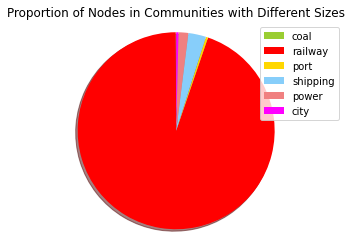

In [54]:
## pie chart of the different types of nodes

import matplotlib.pyplot as plt

colors = ['yellowgreen','red','gold','lightskyblue', 'lightcoral', 'magenta']

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(all_nodes_types_buckets, colors=colors,
        shadow=True, startangle=90) # add autopct='%1.1f%%' for percentages
plt.legend(patches, types_list, loc="best")

ax1.set_title("Proportion of Nodes in Communities with Different Sizes")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Analysis of Communities

### breakdown of communities

In [55]:
# number of communities
print('number of communities: ' + str(len(comm2coord_coal)))
largest_community_number = max(comm2coord_coal, key=lambda x:len(comm2coord_coal[x]))
print('size of largest community: ' + str(len(comm2coord_coal[largest_community_number])))

number of communities: 930549
size of largest community: 1866


In [56]:
com_sizes = []
for i in range(0, len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    com_sizes.append(a)

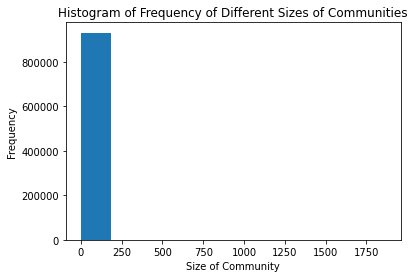

In [57]:
## histogram of frequency of different sizes of communities

plt.xlabel('Size of Community')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency of Different Sizes of Communities')
plt.hist(com_sizes)
plt.show()

In [58]:
com_sizes_more_10 = []
for i in range(0, len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a >= 10:
        com_sizes_more_10.append(a)

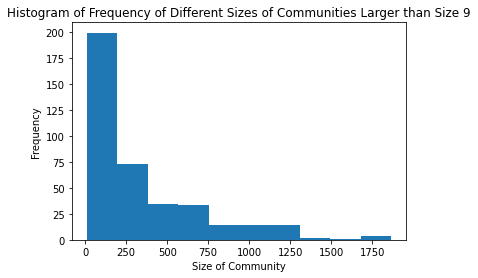

In [59]:
## histogram of frequency of different sizes of communities with size greater than 10

plt.xlabel('Size of Community')
plt.ylabel('Frequency')
plt.hist(com_sizes_more_10)
plt.title('Histogram of Frequency of Different Sizes of Communities Larger than Size 9')
plt.show()

In [60]:
### communities with size 1

count = 0
for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a == 1:
        count += 1
print(count)

930141


In [61]:
### communities with size smaller than 10

count = 0
for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a <= 10:
        count += 1
print(count)

930167


In [62]:
### nodes in communities of size greater than or equal to size 10

count = 0
for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a >= 100:
        count += a
print(count)

121727


In [63]:
len(node2comm_coal)

1057529

In [64]:
size_list = ['size = 1', '1<size=<20', '20<size=<100', '100<size=<1000', '1000<size']
com_sizes_buckets = [0] * len(size_list)

for i in range(len(com_sizes)):
    if com_sizes[i] == 1:
        com_sizes_buckets[0] += 1
    elif com_sizes[i] <= 20:
        com_sizes_buckets[1] += 1
    elif com_sizes[i] <= 100:
        com_sizes_buckets[2] += 1
    elif com_sizes[i] <= 1000:
        com_sizes_buckets[3] += 1
    elif com_sizes[i] > 1000:
        com_sizes_buckets[4] += 1
print(com_sizes_buckets)

[930141, 54, 100, 227, 27]


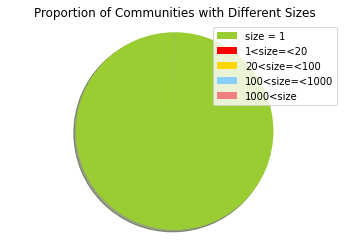

In [65]:
## pie chart of the communities of nodes of different sizes

import matplotlib.pyplot as plt

colors = ['yellowgreen','red','gold','lightskyblue', 'lightcoral']

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(com_sizes_buckets, colors=colors,
        shadow=True, startangle=90) # add autopct='%1.1f%%' for percentages
plt.legend(patches, size_list, loc="best")


ax1.set_title("Proportion of Communities with Different Sizes")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [66]:
total_nodes_in_buckets = [0] * len(size_list)

for i in range(len(com_sizes)):
    if com_sizes[i] == 1:
        total_nodes_in_buckets[0] += com_sizes[i]
    elif com_sizes[i] <= 20:
        total_nodes_in_buckets[1] += com_sizes[i]
    elif com_sizes[i] <= 100:
        total_nodes_in_buckets[2] += com_sizes[i]
    elif com_sizes[i] <= 1000:
        total_nodes_in_buckets[3] += com_sizes[i]
    elif com_sizes[i] > 1000:
        total_nodes_in_buckets[4] += com_sizes[i]
print(total_nodes_in_buckets)

[930141, 606, 5055, 86736, 34991]


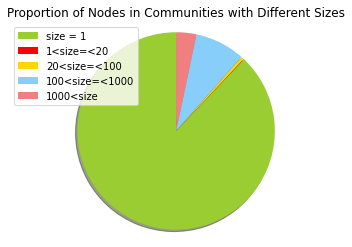

In [67]:
## pie chart of the total number of nodes in communities of nodes of different sizes

import matplotlib.pyplot as plt

colors = ['yellowgreen','red','gold','lightskyblue', 'lightcoral']

fig1, ax1 = plt.subplots()
patches, texts = ax1.pie(total_nodes_in_buckets, colors=colors,
        shadow=True, startangle=90) # add autopct='%1.1f%%' for percentages
plt.legend(patches, size_list, loc="best")

ax1.set_title("Proportion of Nodes in Communities with Different Sizes")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## nodes with flow attached

In [95]:
edge_df

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry,z_inv,flow
0,coal_mine_1920,railway_node_25.9047571-24.6667781,0,coal,railway,"[25.917000000186725, -24.666999999954218]","[25.9047571, -24.6667781]","LINESTRING (25.91700 -24.66700, 25.90476 -24.6...",1.000000,14684
1,railway_node_25.9047571-24.6667781,railway_node_25.9047571-24.6664075,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047571, -24.6664075]","LINESTRING (25.90476 -24.66678, 25.90476 -24.6...",1.000000,14684
2,railway_node_25.9047571-24.6667781,railway_node_25.9047254-24.6670633,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047254, -24.6670633]","LINESTRING (25.90476 -24.66678, 25.90473 -24.6...",1.000000,0
3,coal_mine_1922,railway_node_53.3958054211536635.55213928019969,0,coal,railway,"[53.394000000101364, 35.57499999971285]","[53.39580542115366, 35.55213928019969]","LINESTRING (53.39400 35.57500, 53.39581 35.55214)",1.000000,4677
4,railway_node_53.3958054211536635.55213928019969,railway_node_53.38116831558798535.542777921444795,0,railway,railway,"[53.39580542115366, 35.55213928019969]","[53.381168315587985, 35.542777921444795]","LINESTRING (53.39581 35.55214, 53.38117 35.54278)",1.000000,4570
...,...,...,...,...,...,...,...,...,...,...
2258601,shipping_node_34564,shipping_node_34768,1212,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1...",0.000824,0
2258602,shipping_node_34564,shipping_node_33992,508,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1...",0.001965,0
2258603,shipping_node_33992,shipping_node_34564,508,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1...",0.001965,0
2258604,shipping_node_33992,shipping_node_34768,49,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1...",0.020000,0


In [96]:
edge_df['flow']

0          14684
1          14684
2              0
3           4677
4           4570
           ...  
2258601        0
2258602        0
2258603        0
2258604        0
2258605        0
Name: flow, Length: 2258606, dtype: int64

In [97]:
edge_df['flow'][1]

14684

In [98]:
len(edge_df)

2258606

In [119]:
count = 0
nodes_set = []


for i in range(len(edge_df)):
    if edge_df['flow'][i] != 0:
        nodes_set.append(str(edge_df['start_coordinates'][i]))
        nodes_set.append(str(edge_df['end_coordinates'][i]))
        count += 1
            
print(count)

127162


In [120]:
edge_df

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry,z_inv,flow
0,coal_mine_1920,railway_node_25.9047571-24.6667781,0,coal,railway,"[25.917000000186725, -24.666999999954218]","[25.9047571, -24.6667781]","LINESTRING (25.91700 -24.66700, 25.90476 -24.6...",1.000000,14684
1,railway_node_25.9047571-24.6667781,railway_node_25.9047571-24.6664075,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047571, -24.6664075]","LINESTRING (25.90476 -24.66678, 25.90476 -24.6...",1.000000,14684
2,railway_node_25.9047571-24.6667781,railway_node_25.9047254-24.6670633,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047254, -24.6670633]","LINESTRING (25.90476 -24.66678, 25.90473 -24.6...",1.000000,0
3,coal_mine_1922,railway_node_53.3958054211536635.55213928019969,0,coal,railway,"[53.394000000101364, 35.57499999971285]","[53.39580542115366, 35.55213928019969]","LINESTRING (53.39400 35.57500, 53.39581 35.55214)",1.000000,4677
4,railway_node_53.3958054211536635.55213928019969,railway_node_53.38116831558798535.542777921444795,0,railway,railway,"[53.39580542115366, 35.55213928019969]","[53.381168315587985, 35.542777921444795]","LINESTRING (53.39581 35.55214, 53.38117 35.54278)",1.000000,4570
...,...,...,...,...,...,...,...,...,...,...
2258601,shipping_node_34564,shipping_node_34768,1212,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1...",0.000824,0
2258602,shipping_node_34564,shipping_node_33992,508,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1...",0.001965,0
2258603,shipping_node_33992,shipping_node_34564,508,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1...",0.001965,0
2258604,shipping_node_33992,shipping_node_34768,49,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1...",0.020000,0


In [121]:
nodes_set

['[25.917000000186725, -24.666999999954218]',
 '[25.9047571, -24.6667781]',
 '[25.9047571, -24.6667781]',
 '[25.9047571, -24.6664075]',
 '[53.394000000101364, 35.57499999971285]',
 '[53.39580542115366, 35.55213928019969]',
 '[53.39580542115366, 35.55213928019969]',
 '[53.381168315587985, 35.542777921444795]',
 '[53.39580542115366, 35.55213928019969]',
 '[53.41439054692557, 35.55813984128466]',
 '[52.98099999974161, 36.17099999993142]',
 '[52.975193103458786, 36.17194361255421]',
 '[52.975193103458786, 36.17194361255421]',
 '[52.95475010699489, 36.182582800548694]',
 '[-2.159999999710697, 34.31000000012751]',
 '[-2.183004, 34.3093436]',
 '[-2.183004, 34.3093436]',
 '[-2.1862938, 34.3087238]',
 '[33.72899999977782, -16.115000000096515]',
 '[33.7301248, -16.120079]',
 '[33.7301248, -16.120079]',
 '[33.7277112, -16.1203078]',
 '[7.482999999593258, 6.433000000523869]',
 '[7.4893002, 6.4352075]',
 '[7.4893002, 6.4352075]',
 '[7.4894249, 6.4349077]',
 '[7.4893002, 6.4352075]',
 '[7.4892104, 6

In [122]:
len(nodes_set)

254324

In [123]:
len(set(nodes_set))

127388

In [124]:
set(nodes_set)

{'[-118.9774329998984, 35.37275900002948]',
 '[-57.7278979, -37.4565301]',
 '[-57.8332091, -37.0841662]',
 '[0.683544500823323, 49.281502499846724]',
 '[-86.1019260000153, 42.58924800006135]',
 '[-95.6243420003269, 31.744492999945372]',
 '[-75.04581699953302, 39.990212]',
 '[106.72776031535615, 26.505334854606705]',
 '[4.514283000701441, 52.021469000147555]',
 '[-79.697778, 40.489722]',
 '[15.520794499140523, 46.883691999915875]',
 '[13.01198200015607, 52.37152300020599]',
 '[-84.54795200011932, 38.19284600017864]',
 '[-103.25885200021631, 30.208272000277347]',
 '[-89.55702099965266, 44.90976900041818]',
 '[-80.0946665, 22.540791]',
 '[24.112366636202733, 61.56042670357772]',
 '[26.97474600041456, 43.2553824997775]',
 '[14.7003771, 36.791418]',
 '[30.2950199, 40.5385948]',
 '[8.3185367, 46.0035235]',
 '[-73.4173843, 45.4792907]',
 '[-73.8199690000708, 42.539581000171424]',
 '[30.0539808, -29.7723297]',
 '[96.72509410282419, 17.9619149247227]',
 '[10.3653781, 45.1287106]',
 '[104.675064

## Analysing Communities with size 1

In [ ]:
### types of nodes in size 1 communities

size_1_types = []

for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a == 1:
        size_1_types.append(node_df['type'][comm2nodes_coal[i][0]])

In [ ]:
size_1_types

In [ ]:
types_list

In [ ]:
size_1_types_buckets = [0] * len(types_list)

for i in range(len(size_1_types)):
    for j in range(len(types_list)):
        if size_1_types[i] == types_list[j]:
            size_1_types_buckets[j] += 1
print(size_1_types_buckets)

In [ ]:
headers = ['type', 'number of nodes in size 1 communities']

type_df_size_1 = pd.DataFrame(zip(types_list, size_1_types_buckets), columns = headers)

In [ ]:
type_df_size_1

In [ ]:
## number of shipping nodes with a community size of zero

count = 0
shipping_nodes_size_1 = []

for i in range(len(comm2nodes_coal)):
    if len(comm2nodes_coal[i]) == 1:
        if node_df['type'][comm2nodes_coal[i][0]] == 'shipping':
            count += 1
            shipping_nodes_size_1.append(comm2coord_coal[i][0])

print(count)

In [ ]:
### types of nodes in size 1 communities

size_1_coordinates = []

for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a == 1:
        size_1_coordinates.append(node_df['coordinates'][comm2nodes_coal[i][0]])

In [ ]:
size_1_coordinates

In [ ]:
for i in range(len(edge_df)):
    if str(edge_df['start_coordinates'][i]) == size_1_coordinates[1001] or str(edge_df['end_coordinates'][i]) == size_1_coordinates[1001]:
        print(edge_df['start_type'][i])
        print(edge_df['end_type'][i])

### Plotting size 1 communities

In [ ]:
import copy

In [ ]:
edge_gdf_single_community = copy.deepcopy(edge_gdf)
node_gdf_single_community = copy.deepcopy(node_gdf)

> nodes to drop

In [ ]:
count = 0

nodes_to_drop = []

for i in range(len(comm2coord_coal)):
    if len(comm2nodes_coal[i]) != 1:
        for j in range(len(comm2nodes_coal[i])):
            nodes_to_drop.append(comm2nodes_coal[i][j])
        
print(count)

In [ ]:
len(nodes_to_drop)

In [ ]:
node_gdf_single_community = node_gdf_single_community.drop(index = nodes_to_drop)

In [ ]:
node_gdf_single_community

In [ ]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

#node_gdf_single_community[(node_gdf_single_community['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
#node_gdf_largest_community[(node_gdf_largest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

#node_gdf_largest_community[(node_gdf_largest_community['type']=='city') & (node_gdf_largest_community['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
#node_gdf_largest_community[(node_gdf_largest_community['type']=='power') & (node_gdf_largest_community['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# plot edges
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='railway') | (edge_gdf_largest_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='shipping') | (edge_gdf_largest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-180,180])
ax.set_ylim([-62,90])
ax.axis('off')


plt.show()

## Communities with size 2-10

### Size 2

In [ ]:
### types of nodes in size 1 communities

size_2_types = []

for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a == 2:
        for j in range(a):
            size_2_types.append(node_df['type'][comm2nodes_coal[i][j]])

In [ ]:
len(size_2_types)

In [ ]:
size_2_types_buckets = [0] * len(types_list)

for i in range(len(size_2_types)):
    for j in range(len(types_list)):
        if size_2_types[i] == types_list[j]:
            size_2_types_buckets[j] += 1


print(size_2_types_buckets)

In [ ]:
headers = ['type', 'number of nodes in size 2 communities']

type_df_size_2 = pd.DataFrame(zip(types_list, size_2_types_buckets), columns = headers)

In [ ]:
type_df_size_2

### Size 1 to 20 all together

In [ ]:
### size 1 to 20
number = 20

size_1to20_list_types = [ [] for _ in range(number) ] 

for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    for k in range(number):
        if a == k+1:
            for j in range(a):
                size_1to20_list_types[k].append(node_df['type'][comm2nodes_coal[i][j]])

In [ ]:
# size_1to20_list_types

In [ ]:
size_1to20_types_buckets = [ [0] * len(types_list) for _ in range(number) ]

for k in range(len(size_1to20_list_types)):
    for i in range(len(size_1to20_list_types[k])):
        for j in range(len(types_list)):
            if size_1to20_list_types[k][i] == types_list[j]:
                size_1to20_types_buckets[k][j] += 1


print(size_1to20_types_buckets)

In [ ]:
headers = ['type']

headers.extend(list(range(1, number +1)))

type_df_size_1to20 = pd.DataFrame(zip(types_list, size_1to20_types_buckets[0], size_1to20_types_buckets[1], size_1to20_types_buckets[2], size_1to20_types_buckets[3], size_1to20_types_buckets[4], size_1to20_types_buckets[5], size_1to20_types_buckets[6], size_1to20_types_buckets[7], size_1to20_types_buckets[8], size_1to20_types_buckets[9], size_1to20_types_buckets[10], size_1to20_types_buckets[11], size_1to20_types_buckets[12], size_1to20_types_buckets[13], size_1to20_types_buckets[14], size_1to20_types_buckets[15], size_1to20_types_buckets[16], size_1to20_types_buckets[17], size_1to20_types_buckets[18], size_1to20_types_buckets[19]), columns = headers)

In [ ]:
type_df_size_1to20

### Trying to find interesting communities with size less than 20

#### Interesting 13 community

In [ ]:
### looking at the interesting size 13 community

size_13_types = []
interesting_13 = []

for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a == 13:
        for j in range(a):
            if node_df['type'][comm2nodes_coal[i][j]] == 'city':
                print(comm2nodes_coal[i])
                interesting_13 = comm2nodes_coal[i]
                print(comm2nodes_coal[i][j])
                for l in range(len(comm2nodes_coal[i])):
                    print(node_df['type'][comm2nodes_coal[i][l]])

                    

In [ ]:
interesting_13

> Trying to visualise this

In [ ]:
# read in edge dataframe without the weights

graph_coal = pd.read_csv("graph_coal_uw.txt", delimiter = '\t', header = None) 

In [ ]:
graph_coal

In [ ]:
import time

In [ ]:
time1 = time.time()

for i in range(len(graph_coal)):
    if graph_coal[0][i] == 26:
        print(i)
time2 = time.time()

print(time2-time1)

In [ ]:
# for k in range(len(interesting_13)):
#     print(k)
#     for i in range(len(graph_coal)):
#         if graph_coal[0][i] == interesting_13[k]:
#             print(graph_coal[1][i])
    

In [ ]:
interesting_13_edge_list = []

for k in range(len(interesting_13)):
    print(k)
    for i in range(len(graph_coal)):
        if graph_coal[0][i] == interesting_13[k]:
            if graph_coal[1][i] in interesting_13:
                print(i)
                interesting_13_edge_list.append((graph_coal[0][i] , graph_coal[1][i]))
            else:
                print('not included')

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G_interesting_13 = nx.DiGraph()
G_interesting_13.add_edges_from(interesting_13_edge_list)

In [ ]:
interesting_13_nodes_list = []

for i in range(len(interesting_13)):
    interesting_13_nodes_list.append(node_df['type'][interesting_13[i]])

In [ ]:
interesting_13_nodes_list

In [ ]:
color_map = []
for node in G_interesting_13:
    if node_df['type'][node] == 'coal':
        color_map.append('blue')
    elif node_df['type'][node] == 'railway':
        color_map.append('green')
    elif node_df['type'][node] == 'port':
        color_map.append('orange')
    elif node_df['type'][node] == 'shipping':
        color_map.append('yellow')
    elif node_df['type'][node] == 'power':
        color_map.append('cyan')
    elif node_df['type'][node] == 'city':
        color_map.append('magenta')

In [ ]:
node_df['type'][26]

In [ ]:
nx.draw_kamada_kawai(G_interesting_13, node_color = color_map, with_labels=True)
plt.show()

#### Interesting 17 Community

In [ ]:
### looking at the interesting size 13 community

size_17_types = []
interesting_17 = []

for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a == 17:
        for j in range(a):
            if node_df['type'][comm2nodes_coal[i][j]] == 'city':
                print(comm2nodes_coal[i])
                interesting_17 = comm2nodes_coal[i]
                print(comm2nodes_coal[i][j])
                for l in range(len(comm2nodes_coal[i])):
                    print(node_df['type'][comm2nodes_coal[i][l]])


In [ ]:
interesting_17

In [ ]:
interesting_17_edge_list = []

for k in range(len(interesting_17)):
    print(k)
    for i in range(len(graph_coal)):
        if graph_coal[0][i] == interesting_17[k]:
            if graph_coal[1][i] in interesting_17:
                print(i)
                interesting_17_edge_list.append((graph_coal[0][i] , graph_coal[1][i]))
            else:
                print('not included')

In [ ]:
G_interesting_17 = nx.DiGraph()
G_interesting_17.add_edges_from(interesting_17_edge_list)

In [ ]:
interesting_17_nodes_list = []

for i in range(len(interesting_17)):
    interesting_17_nodes_list.append(node_df['type'][interesting_17[i]])

In [ ]:
interesting_17_nodes_list

In [ ]:
color_map_17 = []
for node in G_interesting_17:
    if node_df['type'][node] == 'coal':
        color_map_17.append('blue')
    elif node_df['type'][node] == 'railway':
        color_map_17.append('green')
    elif node_df['type'][node] == 'port':
        color_map_17.append('orange')
    elif node_df['type'][node] == 'shipping':
        color_map_17.append('yellow')
    elif node_df['type'][node] == 'power':
        color_map_17.append('cyan')
    elif node_df['type'][node] == 'city':
        color_map_17.append('magenta')

In [ ]:
nx.draw_kamada_kawai(G_interesting_17, node_color = color_map_17, with_labels=True)
plt.show()